# Model Building

In this notebook we build the machine learning model, based on the insights obtained in the 3 previous notebooks: data analysis, pre-processing & feature engineering and feature selection.

To ensure reproducibility in production environments, set the seed of the model. 

In [18]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the model
from sklearn.linear_model import LogisticRegression

# Evaluate the model 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Visualize all columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [19]:
# Load the data
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_na
0,0,1.0,1.0,0.748255,0.000,0.333333,0.029758,0.666667,1.0
1,0,0.5,0.0,0.801769,0.000,0.000000,0.020495,0.000000,0.0
2,0,0.5,0.0,0.801769,0.125,0.166667,0.072227,0.666667,0.0
3,0,1.0,0.0,0.710132,0.000,0.000000,0.007832,0.666667,0.0
4,0,1.0,0.0,0.720334,0.000,0.000000,0.014151,0.000000,0.0


In [20]:
# Store the target variable
y_train = X_train['Survived']
y_test = X_test['Survived']

# Drop the target variable in the X's dataset
X_train = X_train.drop(['Survived'], axis=1)
X_test = X_test.drop(['Survived'], axis=1)

In [21]:
# Check X_train
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_na
0,1.0,1.0,0.748255,0.000,0.333333,0.029758,0.666667,1.0
1,0.5,0.0,0.801769,0.000,0.000000,0.020495,0.000000,0.0
2,0.5,0.0,0.801769,0.125,0.166667,0.072227,0.666667,0.0
3,1.0,0.0,0.710132,0.000,0.000000,0.007832,0.666667,0.0
4,1.0,0.0,0.720334,0.000,0.000000,0.014151,0.000000,0.0


In [22]:
# Let's load the pre-selected features

features = pd.read_csv('selected_features.csv', header=None)
features = [x for x in features[0]]

# Print the features
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked', 'Age_na']

In [23]:
# Reduce X_train and X_test to the selected variables
X_train = X_train[features]
X_test = X_test[features]

### Logistic Regression Model

In [24]:
# Initialize the model
clf = LogisticRegression(random_state=0)

# train the model
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [25]:
# Obtain predictions
pred = clf.predict(X_test)

In [26]:
# Let's evaluate the model

# Using classification report object we can 
# see a variety of classifcation metrics

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.73      0.74      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [27]:
# The model can also be evaluated using 
# confusion matrix to compare true positives,
# true negatives, false positives and false
# negatives

cm = confusion_matrix(y_test, pred)
print('Confusion Matrix', cm)

Confusion Matrix [[91 19]
 [18 51]]


Text(0.5, 1.0, 'Feature Importance')

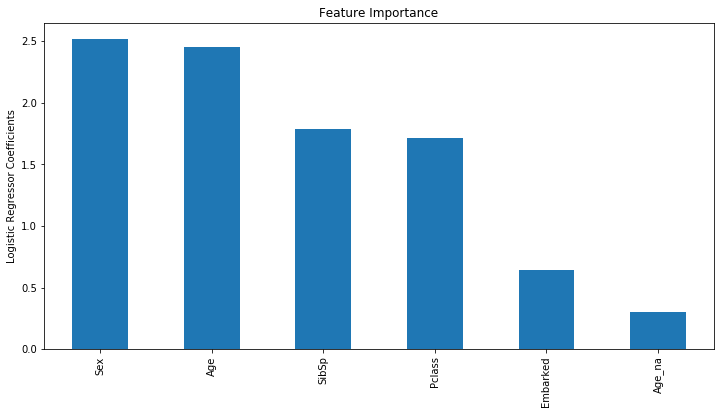

In [34]:
# Let's see the how is the feature importance 

importance = pd.Series(np.abs(clf.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))
plt.ylabel('Logistic Regressor Coefficients')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Feature Importance')

Clearly the two most important features are the Sex and the Age of the passenger when it comes to surviving in the Titanic accident.

The model does a decent job predicting if a passenger will survive or die in the Titanic based on the predictor variables that have been considered. 

Please note that more complex models can be used for this classification task, such as SVM or Random Forest, but we have decided to keep at simple as possible to improve the transition to the production enviroment. 